In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind

In [2]:
df=pd.read_csv('./smartphones.csv')
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [3]:
# Cek jumlah missing values pada setiap kolom
missing_values_count = df.isnull().sum()
print(missing_values_count)

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64


In [4]:
# Mengisi missing values pada fitur numerik dengan nilai median
df["avg_rating"].fillna(df["avg_rating"].median(), inplace=True)
df["processor_speed"].fillna(df["processor_speed"].median(), inplace=True)
df["battery_capacity"].fillna(df["battery_capacity"].median(), inplace=True)
df["fast_charging"].fillna(df["fast_charging"].median(), inplace=True)

In [5]:
# Mengisi missing values pada fitur kategorikal dengan modus
df["processor_brand"].fillna(df["processor_brand"].mode()[0], inplace=True)
df["os"].fillna(df["os"].mode()[0], inplace=True)

In [6]:

# Mengisi missing values dengan nilai rata-rata pada kolom num_cores
mean_num_cores = df['num_cores'].mean()
df['num_cores'].fillna(mean_num_cores, inplace=True)

In [7]:
# Mengisi missing values dengan nilai rata-rata pada kolom primary_camera_front
mean_primary_camera_front = df['primary_camera_front'].mean()
df['primary_camera_front'].fillna(mean_primary_camera_front, inplace=True)

In [8]:
# Cek kembali apakah semua missing values sudah diisi dengan nilai median
missing_values_count_after_fillna = df.isnull().sum()
print(missing_values_count_after_fillna)

brand_name                   0
model                        0
price                        0
avg_rating                   0
5G_or_not                    0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
dtype: int64


In [9]:
# Menyimpan hasil preprocessing
df.to_csv('smartphone_hasil_preprocessing.csv', index=False)

In [10]:
df1=pd.read_csv('./smartphone_hasil_preprocessing.csv')
df1.sample(5)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
817,vivo,Vivo Y21T,15499,7.4,0,snapdragon,8.0,2.40,5000.0,1,...,128,6.51,90,3,android,50.0,8.0,1,720,1600
234,motorola,Motorola Moto G51 5G,12999,7.7,1,snapdragon,8.0,2.20,5000.0,0,...,64,6.80,120,3,android,50.0,13.0,1,2400,1080
190,lenovo,Lenovo Legion Pro 2,59999,8.9,1,snapdragon,8.0,2.84,5000.0,1,...,512,6.50,144,2,android,64.0,20.0,0,2400,1080
430,poco,Poco M4 5G,11499,7.5,1,dimensity,8.0,2.20,5000.0,1,...,64,6.58,90,2,android,50.0,8.0,1,2400,1080
867,xiaomi,Xiaomi Mi 11i 5G,23499,8.1,1,dimensity,8.0,2.50,5160.0,1,...,128,6.67,120,3,android,108.0,16.0,1,1080,2400


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 980 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            980 non-null    object 
 6   num_cores                  980 non-null    float64
 7   processor_speed            980 non-null    float64
 8   battery_capacity           980 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              980 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

PERTANYAAN 1: Bagaimana hubungan antara harga handphone dengan fitur-fitur tertentu seperti kapasitas baterai, kecepatan prosesor, RAM, dan ukuran layar?

Analisa korelasi ini bertujuan untuk menganalisis korelasi antara harga handphone dengan beberapa fitur yang relevan. 

In [12]:
# Melakukan analisis korelasi dengan metode Pearson
corr_matrix_pearson = df1.corr(method='pearson')

In [13]:
# Melihat korelasi harga handphone dengan fitur-fitur lainnya
correlation_with_price_pearson = corr_matrix_pearson['price']

print("Korelasi Pearson dengan Price:")
print(correlation_with_price_pearson)

Korelasi Pearson dengan Price:
price                        1.000000
avg_rating                   0.268652
5G_or_not                    0.305066
num_cores                   -0.048122
processor_speed              0.437674
battery_capacity            -0.155412
fast_charging_available      0.116739
fast_charging                0.183237
ram_capacity                 0.386002
internal_memory              0.557168
screen_size                  0.113253
refresh_rate                 0.244115
num_rear_cameras             0.125330
primary_camera_rear          0.092095
primary_camera_front         0.160262
extended_memory_available   -0.448628
resolution_height            0.353578
resolution_width             0.340592
Name: price, dtype: float64


Dari hasil analisis korelasi Pearson antara fitur-fitur dengan harga handphone (kolom "price"):

Fitur yang memiliki Korelasi Positif dengan Harga Handphone:

Processor_speed: Memiliki korelasi positif sebesar 0.437674, yang menunjukkan bahwa semakin tinggi kecepatan prosesor, kemungkinan harga handphone juga lebih tinggi.

Internal_memory: Memiliki korelasi positif yang cukup tinggi sebesar 0.557168, menunjukkan bahwa semakin besar kapasitas memori internal, harga handphone cenderung lebih tinggi.

Ram_capacity: Memiliki korelasi positif sebesar 0.386002, yang menandakan bahwa semakin besar kapasitas RAM, harga handphone cenderung lebih tinggi.

Resolution_height dan Resolution_width: Keduanya memiliki korelasi positif dengan harga handphone, menunjukkan bahwa semakin tinggi resolusi layar (tinggi dan lebar), harga handphone cenderung lebih tinggi.

Fitur yang memiliki Korelasi Negatif dengan Harga Handphone:

Battery_capacity: Memiliki korelasi negatif sebesar -0.155412, yang menandakan bahwa semakin besar kapasitas baterai, harga handphone cenderung lebih rendah.

Extended_memory_available: Memiliki korelasi negatif yang cukup kuat sebesar -0.448628, menunjukkan bahwa jika handphone memiliki fitur untuk memperluas memori (seperti slot kartu memori), harga cenderung lebih rendah.

Fitur dengan Korelasi yang Kurang Signifikan:

Avg_rating, 5G_or_not, Fast_charging, Screen_size, Refresh_rate, Num_rear_cameras, Primary_camera_rear, dan Primary_camera_front memiliki korelasi dengan harga handphone yang lebih rendah (antara 0.1 hingga 0.3), menunjukkan bahwa hubungan antara fitur-fitur ini dengan harga tidak begitu kuat.

Dengan demikian, berdasarkan analisis korelasi, kita dapat mengidentifikasi fitur-fitur yang paling berpengaruh terhadap harga handphone, seperti kecepatan prosesor, kapasitas internal memory, kapasitas RAM, dan resolusi layar. Selain itu, terdapat fitur-fitur seperti kapasitas baterai dan kemampuan memperluas memori yang juga mempengaruhi harga handphone secara signifikan.

memvisualisasikan data dan memahami distribusi serta hubungan antara harga dan fitur-fitur lainnya

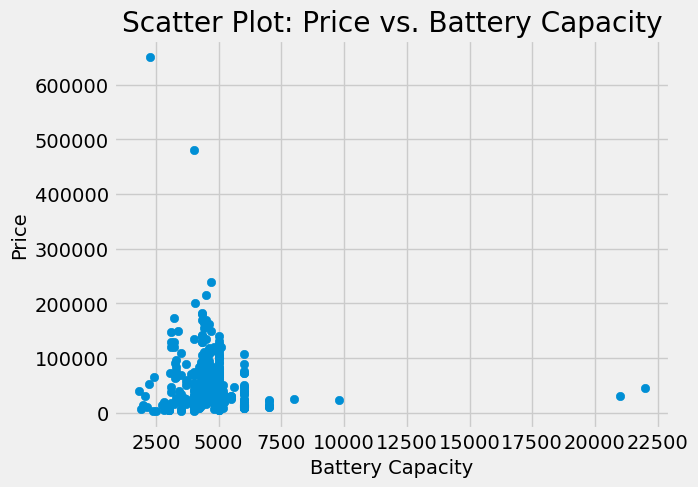

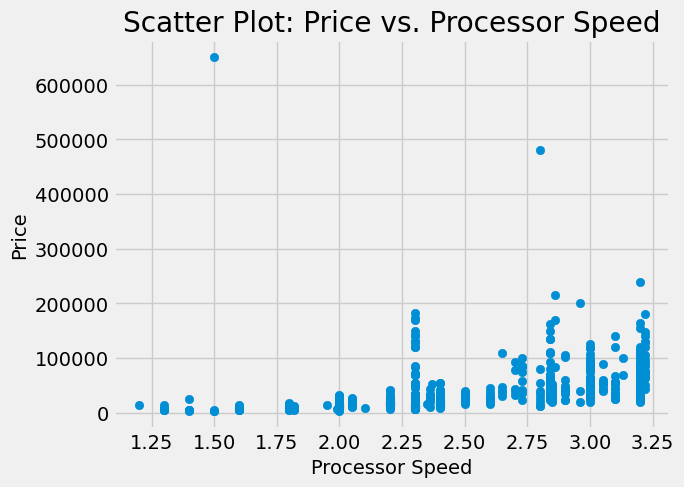

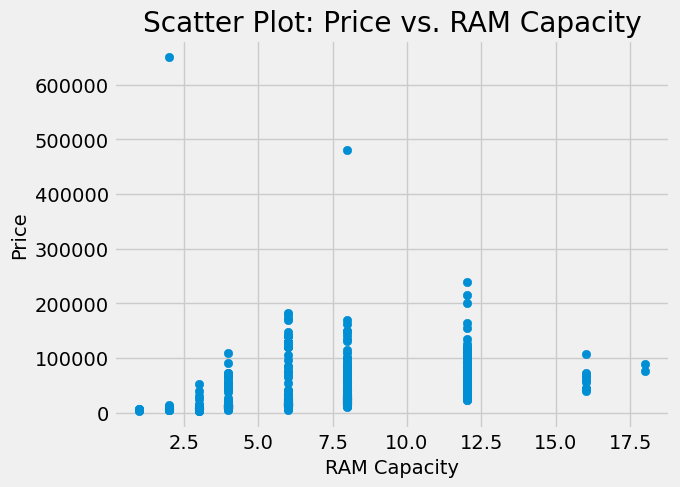

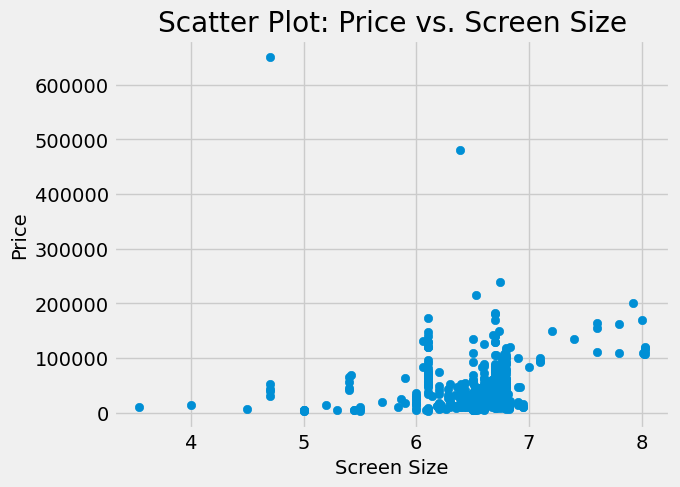

In [14]:

# Scatter plot untuk melihat hubungan antara harga dan kapasitas baterai
plt.scatter(df1["battery_capacity"], df1["price"])
plt.xlabel("Battery Capacity")
plt.ylabel("Price")
plt.title("Scatter Plot: Price vs. Battery Capacity")
plt.show()

# Scatter plot untuk melihat hubungan antara harga dan kecepatan prosesor
plt.scatter(df1["processor_speed"], df1["price"])
plt.xlabel("Processor Speed")
plt.ylabel("Price")
plt.title("Scatter Plot: Price vs. Processor Speed")
plt.show()

# Scatter plot untuk melihat hubungan antara harga dan kapasitas RAM
plt.scatter(df1["ram_capacity"], df1["price"])
plt.xlabel("RAM Capacity")
plt.ylabel("Price")
plt.title("Scatter Plot: Price vs. RAM Capacity")
plt.show()

# Scatter plot untuk melihat hubungan antara harga dan ukuran layar
plt.scatter(df1["screen_size"], df1["price"])
plt.xlabel("Screen Size")
plt.ylabel("Price")
plt.title("Scatter Plot: Price vs. Screen Size")
plt.show()

In [15]:
# Pisahkan fitur dan target
X = df1[['battery_capacity', 'processor_speed', 'ram_capacity', 'screen_size']]
y = df1['price']

In [16]:
# Pisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model regresi linier
reg_model = LinearRegression()

# Latih model dengan data training
reg_model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Lakukan prediksi harga dengan data testing
y_pred = reg_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Koefisien regresi:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)

Mean Squared Error (MSE): 675882685.0686986
R-squared (R2): 0.369785383194454
Koefisien regresi: [-5.21783826e+00  2.74280505e+04  2.96344283e+03 -8.60964195e+03]
Intercept: 28122.533029995266


Berdasarkan analisis menggunakan regresi linear, kita dapat menyimpulkan bahwa hubungan antara harga handphone dengan fitur-fitur tertentu (kapasitas baterai, kecepatan prosesor, RAM, dan ukuran layar) belum bisa dijelaskan secara optimal oleh model ini. Hal ini ditunjukkan oleh nilai R-squared (R2) yang rendah, yaitu sekitar 0.37. Artinya, hanya sekitar 37% variabilitas harga handphone yang dapat dijelaskan oleh fitur-fitur tersebut dalam dataset ini.

Hasil koefisien regresi menunjukkan bahwa masing-masing fitur memiliki pengaruh yang berbeda terhadap harga handphone. Koefisien negatif menunjukkan bahwa semakin tinggi nilai fitur, semakin rendah harga handphone, dan sebaliknya untuk koefisien positif.

PERTANYAAN 2 : Dari semua fitur yang tersedia, manakah yang memiliki pengaruh paling signifikan terhadap harga handphone?

In [18]:
# Drop kolom non-numerik yang tidak relevan
df2 = df1.drop(['brand_name', 'model', 'processor_brand', 'os'], axis=1)
df2.head()


,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,38999,7.3,0,6.0,2.65,3110.0,0,33.0,4,64,6.1,60,2,12.0,12.0,0,1792,828
1,46999,7.5,0,6.0,2.65,3110.0,0,33.0,4,128,6.1,60,2,12.0,12.0,0,1792,828
2,109900,7.7,0,6.0,2.65,3500.0,1,18.0,4,64,6.5,60,3,12.0,12.0,0,2688,1242
3,51999,7.4,1,6.0,3.10,5000.0,0,33.0,4,64,6.1,60,2,12.0,12.0,0,2532,1170
4,55999,7.5,1,6.0,3.10,5000.0,0,33.0,4,128,6.1,60,2,12.0,12.0,0,2532,1170


In [19]:
# Pisahkan fitur dan target
X1 = df2.drop('price', axis=1)
y1 = df2['price']
X1.head()


,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,7.3,0,6.0,2.65,3110.0,0,33.0,4,64,6.1,60,2,12.0,12.0,0,1792,828
1,7.5,0,6.0,2.65,3110.0,0,33.0,4,128,6.1,60,2,12.0,12.0,0,1792,828
2,7.7,0,6.0,2.65,3500.0,1,18.0,4,64,6.5,60,3,12.0,12.0,0,2688,1242
3,7.4,1,6.0,3.10,5000.0,0,33.0,4,64,6.1,60,2,12.0,12.0,0,2532,1170
4,7.5,1,6.0,3.10,5000.0,0,33.0,4,128,6.1,60,2,12.0,12.0,0,2532,1170


In [20]:
y1.head()

0     38999
1     46999
2    109900
3     51999
4     55999
Name: price, dtype: int64

In [21]:
# Buat model Linear Regression
model = LinearRegression()
model.fit(X1, y1)

# Hitung feature importance
feature_importance = model.coef_
print(feature_importance)

[-5.99588933e+03 -2.73836083e+03 -2.58970736e+03  1.32996595e+04
 -3.77801845e+00 -1.43115566e+04 -1.99231622e+02  9.02933719e+02
  1.41838402e+02 -4.55326303e+03 -1.35136906e+01  4.37728066e+02
  6.54639589e+01 -1.76827379e+02 -1.80262262e+04  1.28410358e+01
  2.40365342e+01]


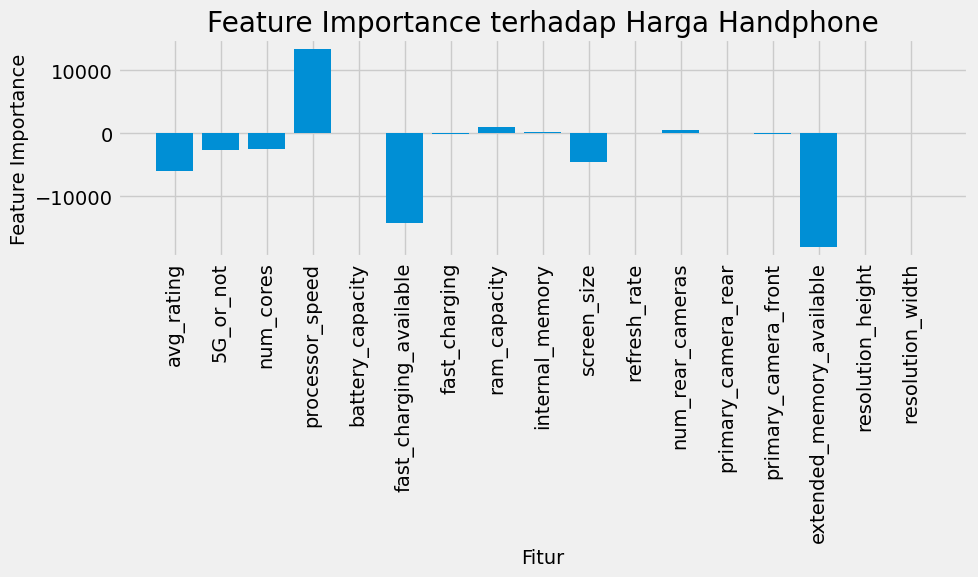

In [22]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.bar(X1.columns, feature_importance)
plt.xlabel('Fitur')
plt.ylabel('Feature Importance')
plt.title('Feature Importance terhadap Harga Handphone')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 Dari hasil analisis fitur importance, beberapa fitur yang paling signifikan dalam mempengaruhi harga handphone adalah kapasitas baterai, kapasitas RAM, kapasitas memori internal, jumlah kamera belakang, dan resolusi layar secara vertikal. Fitur-fitur tersebut memiliki pengaruh positif terhadap harga handphone. 
 
 Sementara itu, beberapa fitur lainnya seperti "avg_rating", "5G_or_not", "processor_speed", dan "extended_memory_available" memiliki pengaruh negatif terhadap harga handphone.

PERTANYAAN 3: Apakah ada perbedaan harga antara handphone 5G dan non-5G? Jika ada, berapa besarnya perbedaan tersebut?

In [23]:
# Pisahkan data menjadi dua kelompok berdasarkan fitur 5G_or_not
data_5g = df1[df1['5G_or_not'] == 1]
data_non_5g = df1[df1['5G_or_not'] == 0]

In [24]:
# Ambil kolom harga untuk kedua kelompok
harga_5g = data_5g['price']
harga_non_5g = data_non_5g['price']

In [25]:
# Lakukan t-test untuk menguji perbedaan harga
t_stat, p_value = ttest_ind(harga_5g, harga_non_5g)

# Tentukan tingkat signifikansi (misalnya 0.05)
alpha = 0.05

if p_value < alpha:
    print("Terdapat perbedaan harga yang signifikan antara handphone 5G dan non-5G.")
else:
    print("Tidak terdapat perbedaan harga yang signifikan antara handphone 5G dan non-5G.")

# Hitung besarnya perbedaan harga (rata-rata harga handphone 5G - rata-rata harga handphone non-5G)
perbedaan_harga = harga_5g.mean() - harga_non_5g.mean()
print(f"Besar perbedaan harga antara handphone 5G dan non-5G adalah: {perbedaan_harga}")

Terdapat perbedaan harga yang signifikan antara handphone 5G dan non-5G.
Besar perbedaan harga antara handphone 5G dan non-5G adalah: 24283.954517600025


Perbedaan ini menunjukkan bahwa handphone yang mendukung fitur 5G cenderung memiliki harga yang lebih tinggi dibandingkan dengan handphone yang tidak memiliki fitur 5G. Perbedaan harga ini bisa dipengaruhi oleh berbagai faktor, seperti perbedaan spesifikasi teknis, merek, dan fitur tambahan yang terdapat pada handphone dengan fitur 5G.

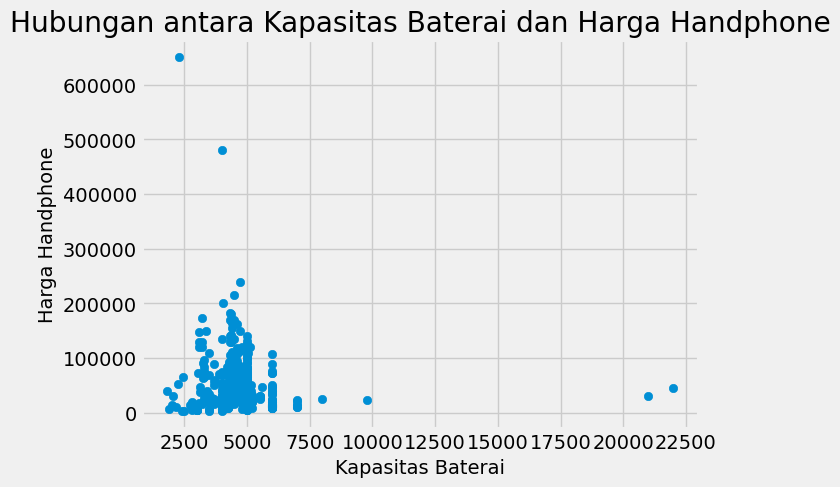

Korelasi Pearson antara harga handphone dan kapasitas baterai: -0.15541150295606296


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data (ganti 'data.csv' dengan nama file dataset Anda)
data = pd.read_csv('./smartphone_hasil_preprocessing.csv')

# Mengisi missing values dengan nilai rata-rata pada setiap kolom
data = data.fillna(data.mean())

# Ambil kolom harga dan kapasitas baterai
harga = data['price']
kapasitas_baterai = data['battery_capacity']

# Hitung korelasi Pearson antara harga dan kapasitas baterai
correlation = np.corrcoef(harga, kapasitas_baterai)[0, 1]

# Plot scatter plot untuk visualisasi hubungan antara harga dan kapasitas baterai
plt.scatter(kapasitas_baterai, harga)
plt.xlabel('Kapasitas Baterai')
plt.ylabel('Harga Handphone')
plt.title('Hubungan antara Kapasitas Baterai dan Harga Handphone')
plt.show()

print(f"Korelasi Pearson antara harga handphone dan kapasitas baterai: {correlation}")


Korelasi Pearson antara harga handphone dan kapasitas baterai adalah -0.155. Korelasi ini menunjukkan bahwa ada hubungan lemah dan negatif antara harga handphone dan kapasitas baterai. Artinya, jika kapasitas baterai semakin tinggi, maka kemungkinan harga handphone akan sedikit lebih rendah. dan masih banyak faktor lain yang dapat mempengaruhi harga handphone